<h1 style="
    font-size: 16px;
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;     
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
">
The data contains significant variations and differences in values, and some values ​​are abnormally repetitive, such as the presence of "UNKNOWN" in the date.
</h1>


<h1 style="
    font-size: 16px;
    background-color: #1a2a36;
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    display: inline-block;
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
    1) Transaction ID:
</h1>

In [1]:
%pip install pandas missingno plotly numpy
 

Note: you may need to restart the kernel to use updated packages.


<h1 style="
    font-size: 30px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    display: inline-block;
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
Libraries</h1>

In [2]:
import pandas as pd
import missingno as msno
import plotly.graph_objects as go
import numpy as np

<h1 style="
    font-size: 30px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    display: inline-block;
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
    Importing Data
</h1>

In [3]:
df = pd.read_csv('dirty_cafe_sales.csv')

<h1 style="
    font-size: 30px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    display: inline-block;
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
    Initial Inspection
</h1>

<h1 style="
    font-size: 20px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    /* display: inline-block; */
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);    
">
    1) General overview of the dataset
</h1>



In [4]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


The data contains incorrect values ​​such as "ERROR" and "UNKNOWN"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


All the data is stored as object and contains many missing values ​​in more than one column, which shows that it needs to be converted to appropriate data types and cleaned up

In [6]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


The data contains significant variations and differences in values, and some values ​​are abnormally repetitive, such as the presence of "UNKNOWN" in the date.


<h1 style="
    font-size: 20px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    /* display: inline-block; */
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);    
">
    2) Check Nulls
</h1>

<Axes: >

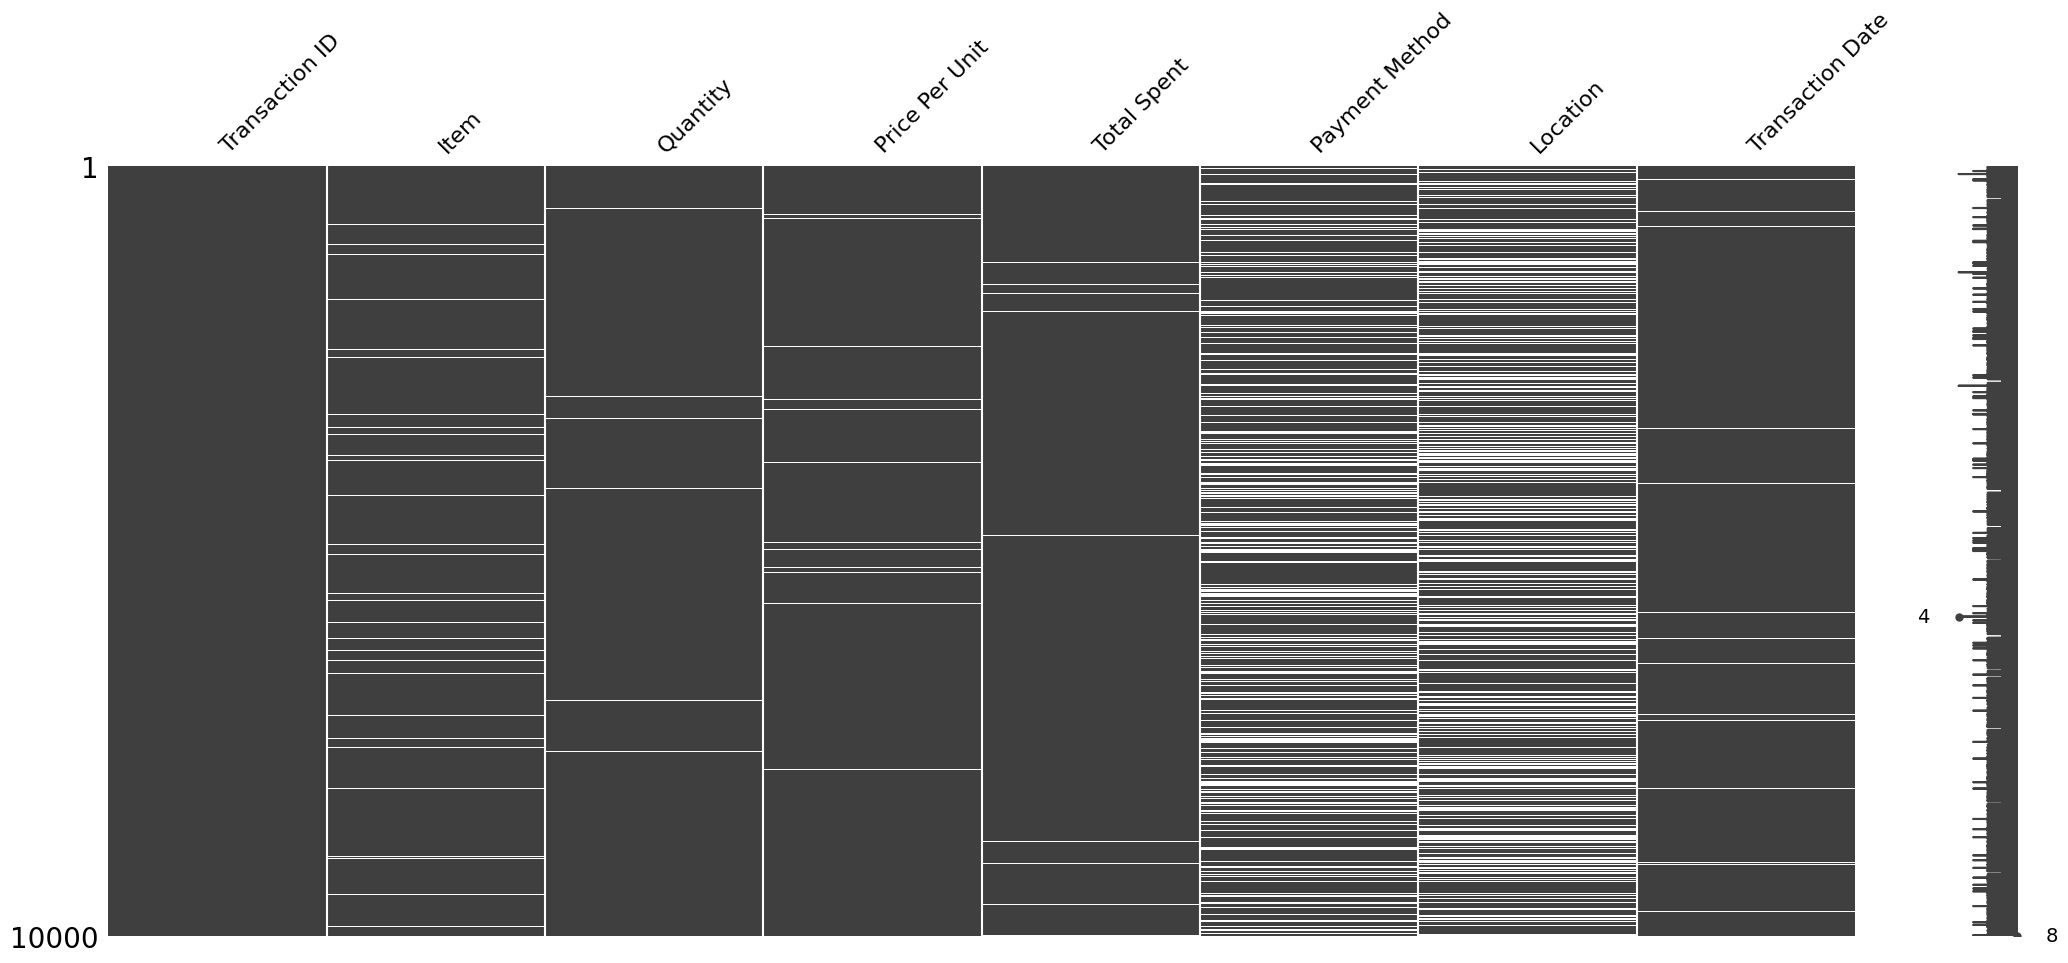

In [7]:
msno.matrix(df)

In [8]:
print('Nulls in dataset: \n', df.isnull().sum())

Nulls in dataset: 
 Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [9]:
print('Total Nulls in dataset:', df.isnull().sum().sum())

Total Nulls in dataset: 6826


The largest data loss is concentrated in the Location and Payment Method columns, while the remaining columns have very minor data loss. A total of 6,826 values ​​are missing; however, the Transaction ID column is completely intact and contains no blank values

<h1 style="
    font-size: 20px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    /* display: inline-block; */
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);    
">
3) Check duplicates
</h1>

In [10]:
print('Total duplicated in the dataset: ', df.duplicated().sum())

Total duplicated in the dataset:  0


The code indicates that there are no exact duplicates in the dataset, as the result was zero. This means that the duplicates may be partial and not a perfect match in every column

<h1 style="
    font-size: 30px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    display: inline-block;
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
Initial Issue Detection Summary 
</h1>

<h1 style="
    font-size: 16px;
    background-color:rgba(255, 255, 255, 0.07);
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    padding: 10px;
    margin: 0px;
    border-radius: 8px;  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">

1- Wrong Data Types: all columns (including numbers and dates) are stored as objects. This means we cannot perform any calculations or time analysis until the data has been cast

2- Inconsistent Values: the data Dirty contains strange texts inside important columns, such as the word "ERROR" in the price column, and the word "UNKNOWN" which is repeated very often in the date column (it is the most frequently repeated value!)

3- Missing Data Distribution: we have a major problem with the Location column (30% loss) and Payment Method column (25% loss). The remaining columns have minor losses that can be easily compensated for.

4- The trick of duplicates: a result of 0 duplicates means there are no 100% identical rows, but this does not preclude the existence of duplicates in transaction IDs with different data, and this needs to be checked again during the cleaning process.
</h1>

<h1 style="
    font-size: 30px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    display: inline-block;
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
Cleaning & Preporcessing
</h1>

<h1 style="
    font-size: 20px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    /* display: inline-block; */
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);    
">
1) Transaction ID — Duplication Check
</h1>

In [11]:
print("total rows:", len(df))
print("unique transaction IDs:", df['Transaction ID'].nunique())
duplicates = df[df.duplicated(subset=['Transaction ID'], keep=False)]
print("duplicates count:", len(duplicates))

total rows: 10000
unique transaction IDs: 10000
duplicates count: 0


All transaction ID values ​​are completely unique, with the number of unique values ​​matching the total number of rows (10,000), which confirms that there are no duplicate transactions

<h1 style="
    font-size: 20px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    /* display: inline-block; */
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);    
">
2) Item — Standardization and checking of missing values
</h1>

In [12]:
print(df['Item'].value_counts(dropna=False))

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
NaN          333
ERROR        292
Name: count, dtype: int64


The presence of invalid text values ​​(UNKNOWN and ERROR) in addition to null values ​​(NaN) necessitates converting them all to nulls and processing them uniformly.

In [13]:
df['Item'] = (
    df['Item']
    .astype(str)    # Convert all values ​​to text
    .str.strip()    # Scanning excess spaces
    .str.lower()    # Conversion to lowercase letters
    .replace({'nan': pd.NA, 'unknown': pd.NA, 'error': pd.NA})  # Replace invalid values
)

In [14]:
print(df['Item'].value_counts(dropna=False))

Item
juice       1171
coffee      1165
salad       1148
cake        1139
sandwich    1131
smoothie    1096
cookie      1092
tea         1089
<NA>         969
Name: count, dtype: int64


In [15]:
# Percentage of missing values ​​in the column
na_percentage = df['Item'].isna().mean() * 100
print(f"Percentage of NA: {na_percentage:.2f}%")

Percentage of NA: 9.69%


A 9.69% missing rate is significant. Dropping these rows would mean losing 969 records that may hold valuable insights in other columns. Imputing with the Mode (Most Frequent Value) would distort the data distribution. Since 'Juice' is the mode, using it to fill nulls would artificially inflate its count, leading to misleading analysis. Therefore, the best approach is to fill missing values with 'Unknown'. This preserves data integrity (keeping all rows) without introducing bias or false assumptions

In [16]:
df['Item'] = df['Item'].fillna('unknown')

In [17]:
print(df['Item'].value_counts(dropna=False))

Item
juice       1171
coffee      1165
salad       1148
cake        1139
sandwich    1131
smoothie    1096
cookie      1092
tea         1089
unknown      969
Name: count, dtype: int64


In [18]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,unknown,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


<h1 style="
    font-size: 20px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    /* display: inline-block; */
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);    
">
3) Quantity — Converting to numbers and dealing with non-numeric values
</h1>

In [19]:
print(df['Quantity'].value_counts(dropna=False))

Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
NaN         138
Name: count, dtype: int64


In [20]:
print("Type Before:", df['Quantity'].dtype)

Type Before: object


The column contains corrupt text values ​​(UNKNOWN and ERROR) in addition to missing values, which requires replacing the corrupt values ​​with NaN and correcting the column type to become numeric

In [21]:
# Converting misspelled words to NaN
vals_to_replace = ['UNKNOWN', 'ERROR', 'nan']
df['Quantity'] = df['Quantity'].replace(vals_to_replace, np.nan)

# Convert column from text to numbers
df['Quantity'] = pd.to_numeric(df['Quantity'])

In [22]:
print("Type After:", df['Quantity'].dtype)

Type After: float64


In [23]:
# Percentage of missing values ​​in the column
na_percentage = df['Quantity'].isna().mean() * 100
print(f"Percentage of NA: {na_percentage:.2f}%")

Percentage of NA: 4.79%


You now have 4.79% missing values. This percentage is small and the data is balanced, so the best option is Median Imputation. You won't lose the remaining information in the other columns

In [24]:
# Fill in the blanks with the mediator
median_val = df['Quantity'].median()
df['Quantity'] = df['Quantity'].fillna(median_val)

In [25]:
print(df['Quantity'].value_counts(dropna=False))

Quantity
3.0    2328
5.0    2013
2.0    1974
4.0    1863
1.0    1822
Name: count, dtype: int64


<h1 style="
    font-size: 20px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    /* display: inline-block; */
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);    
">
4) Price Per Unit — Cleaning and Conversion</h1>

<h1 style="
    font-size: 20px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    /* display: inline-block; */
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);    
">
5) Total Spent — Clean, convert, and compare with the account
</h1>

<h1 style="
    font-size: 20px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    /* display: inline-block; */
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);    
">
6) Payment Method — Unifying and classifying incorrect values
</h1>

<h1 style="
    font-size: 20px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    /* display: inline-block; */
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);    
">
7) Location — Standardizing values ​​and loss ratio
</h1>

<h1 style="
    font-size: 20px;
    /* background-color: #1a2a36; */
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    /* display: inline-block; */
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);    
">
8) Transaction Date — Convert to datetime and extract date fragments
</h1>